#### Install python dependencies:

In [1]:
!bash ./scripts/install_pip.sh

+ pip install gdown
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
+ pip install nibabel
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
+ pip install dicom2nifti
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
+ pip install dipy
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
+ pip install pandas
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


#### Let's load some sample dasets to test the code. 

In [2]:
!bash ./datasets/download_sample_dataset.sh

Downloading...
From: https://drive.google.com/uc?id=1QZNgRojYpYBLzUQJntWAmw1QwQMh4H50
To: /tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/datasets/sample_nifti_3D/patient101_frame14.nii.gz
100%|████████████████████████████████████████| 667k/667k [00:00<00:00, 3.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zFJM_qQKwz85xiYpX3XBRqhL0SQwy-Iw
To: /tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/datasets/sample_nifti_3D/patient101_frame01.nii.gz
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 6.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FqTquCYhLD2-EKxmCR9A5zt5265AEPdQ
To: /tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/datasets/sample_nifti_4D/patient101_4d.nii.gz
20.0MB [00:01, 14.6MB/s]


#### Load the pre-trained models that attached to the publication. This will download the cardiac segmentation and motion estimation trained parameters: 

In [3]:
!bash ./pretrained_models/download_model.sh

Note: available models are carson_Jan2021, carmen_Jan2021
Downloading...
From: https://drive.google.com/uc?id=1rINpNPZ4_lT9XuFB6Q7gyna_L4O3AIY9
To: /tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/pretrained_models/carson_Jan2021.h5
229MB [00:13, 17.5MB/s] 
Downloading...
From: https://drive.google.com/uc?id=10eMGoYYa4xFdwFuiwC7bwVSJ6b-bx7Ni
To: /tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/pretrained_models/carmen_Jan2021.h5
449MB [00:29, 15.0MB/s] 


#### Test segmentation on 3D data in NIFTI format. 

In [4]:
!bash ./scripts/test_segmentation.sh ./datasets/sample_nifti_3D NIFTI ./results/sample_nifti_3D

+ DATAROOT=./datasets/sample_nifti_3D
+ DATAFORMAT=NIFTI
+ RESULTS_DIR=./results/sample_nifti_3D
+ CARSON_PATH=../private_models/main_carson_model.h5
+ CARMEN_PATH=./pretrained_models/carmen_Jan2021.h5
+ PIPELINE=segmentation
+ CUDA_VISIBLE_DEVICES=
+ python ./test.py --dataroot ./datasets/sample_nifti_3D --dataformat NIFTI --results_dir ./results/sample_nifti_3D --pretrained_models_netS ../private_models/main_carson_model.h5 --pretrained_models_netME ./pretrained_models/carmen_Jan2021.h5 --pipeline segmentation
2021-06-29 14:08:01.947250: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-29 14:08:05.575522: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-29 14:08:06.532798: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-29 14:08:06.532887: I ten

In [62]:
import glob
import h5py 
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt

(232, 256, 10) (232, 256, 10)


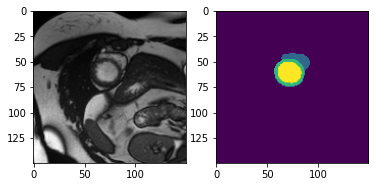

(232, 256, 10) (232, 256, 10)


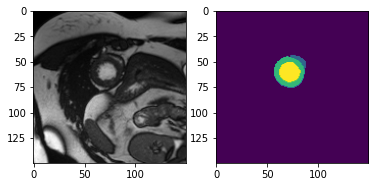

In [32]:
for image_path, label_path in zip(glob.glob('./datasets/sample_nifti_3D/*'),
                                  glob.glob('./results/sample_nifti_3D/*')):
    
    image = nib.load(image_path).get_fdata()
    label = nib.load(label_path).get_fdata()
    
    print(image.shape, label.shape);
    
    plt.subplot(121)
    plt.imshow(image[50:200,50:200,8], cmap='gray')
    plt.subplot(122)
    plt.imshow(label[50:200,50:200,8])
    plt.show()

#### Test segmentation on 4D (3D + time) data in NIFTI format. 

In [33]:
!bash ./scripts/test_segmentation.sh ./datasets/sample_nifti_4D NIFTI ./results/sample_nifti_4D

+ DATAROOT=./datasets/sample_nifti_4D
+ DATAFORMAT=NIFTI
+ RESULTS_DIR=./results/sample_nifti_4D
+ CARSON_PATH=../private_models/main_carson_model.h5
+ CARMEN_PATH=./pretrained_models/carmen_Jan2021.h5
+ PIPELINE=segmentation
+ CUDA_VISIBLE_DEVICES=
+ python ./test.py --dataroot ./datasets/sample_nifti_4D --dataformat NIFTI --results_dir ./results/sample_nifti_4D --pretrained_models_netS ../private_models/main_carson_model.h5 --pretrained_models_netME ./pretrained_models/carmen_Jan2021.h5 --pipeline segmentation
2021-06-29 14:18:53.614465: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-29 14:18:55.810322: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-29 14:18:56.344677: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-29 14:18:56.344741: I ten

(232, 256, 10, 30) (232, 256, 10, 30)


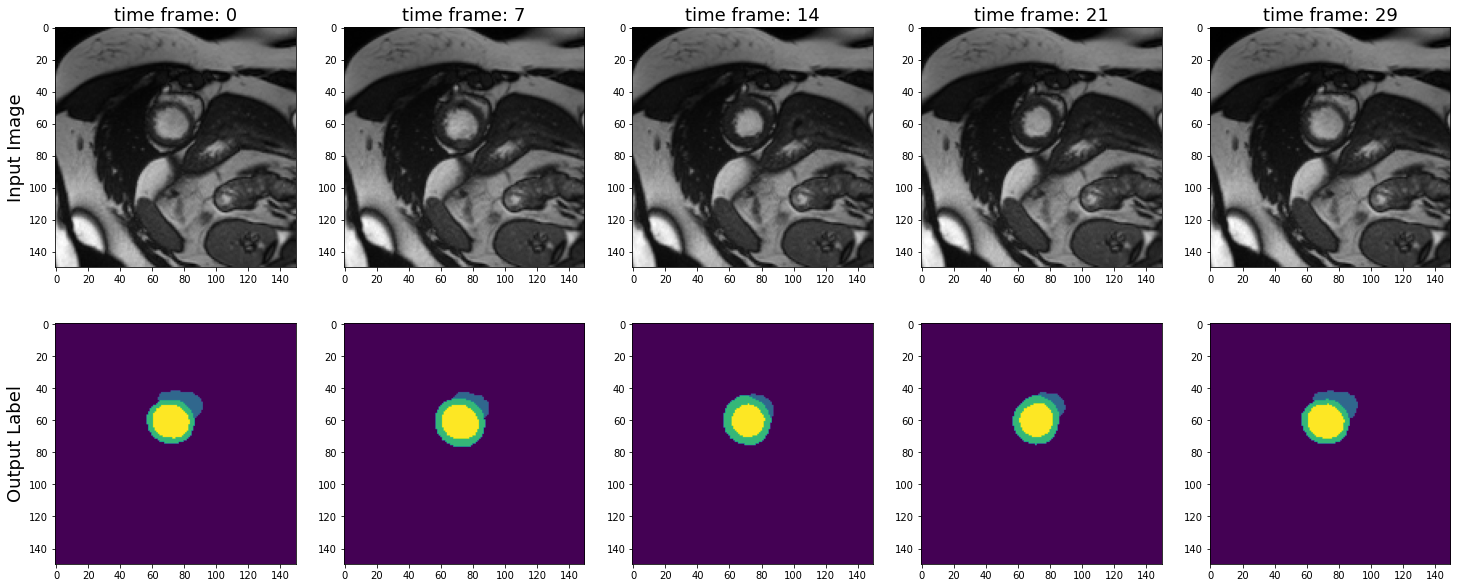

In [54]:
for image_path, label_path in zip(glob.glob('./datasets/sample_nifti_4D/*'),
                                  glob.glob('./results/sample_nifti_4D/*')):
    
    image = nib.load(image_path).get_fdata()
    label = nib.load(label_path).get_fdata()
    
    print(image.shape, label.shape);
    
    n_time_frames = image.shape[-1]
    
    fig, ax = plt.subplots(2,5,figsize=(25,10))
    for j, time_frame in enumerate(np.linspace(0, n_time_frames-1, 5, dtype=int)):
        ax[0,j].imshow(image[50:200,50:200,8,time_frame], cmap='gray'); 
        ax[0,j].set_title('time frame: %d'%(time_frame), fontsize=18)
        
        ax[1,j].imshow(label[50:200,50:200,8,time_frame])
        
        if j == 0:
            ax[0,j].set_ylabel('Input Image', fontsize=18)
            ax[1,j].set_ylabel('Output Label', fontsize=18)
    plt.show()

#### Test motion on 4D (3D + time) data in NIFTI format. Motion is only avilable for 4D data. 

In [55]:
!bash ./scripts/test_motion.sh ./datasets/sample_nifti_4D NIFTI ./results/sample_nifti_4D

+ DATAROOT=./datasets/sample_nifti_4D
+ DATAFORMAT=NIFTI
+ RESULTS_DIR=./results/sample_nifti_4D
+ CARSON_PATH=./pretrained_models/carson_Jan2021.h5
+ CARMEN_PATH=./pretrained_models/carmen_Jan2021.h5
+ PIPELINE=motion
+ CUDA_VISIBLE_DEVICES=
+ python ./test.py --dataroot ./datasets/sample_nifti_4D --dataformat NIFTI --results_dir ./results/sample_nifti_4D --pretrained_models_netS ./pretrained_models/carson_Jan2021.h5 --pretrained_models_netME ./pretrained_models/carmen_Jan2021.h5 --pipeline motion
2021-06-29 14:33:04.173768: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-29 14:33:07.310856: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-29 14:33:07.847559: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-29 14:33:07.847608: I tensorflow/stream

In [93]:
from data import nifti_dataset

In [94]:
mask_nifti = nifti_dataset.resample_nifti(nib.load(image_path), in_plane_resolution_mm=1.25, number_of_slices=16)

/tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/data/nifti_dataset.py:77: UserWarning: Affine in nifti might be set incorrectly. Setting to affine=affine*zooms
  warnings.warn("Affine in nifti might be set incorrectly. Setting to affine=affine*zooms")


In [95]:
mask_nifti.shape

(304, 336, 16, 30)

/tf/Dropbox (Partners HealthCare)/ubuntu/docker/repos/DeepStrain/data/nifti_dataset.py:77: UserWarning: Affine in nifti might be set incorrectly. Setting to affine=affine*zooms
  warnings.warn("Affine in nifti might be set incorrectly. Setting to affine=affine*zooms")


(304, 336, 16, 30) (304, 336, 16, 3)


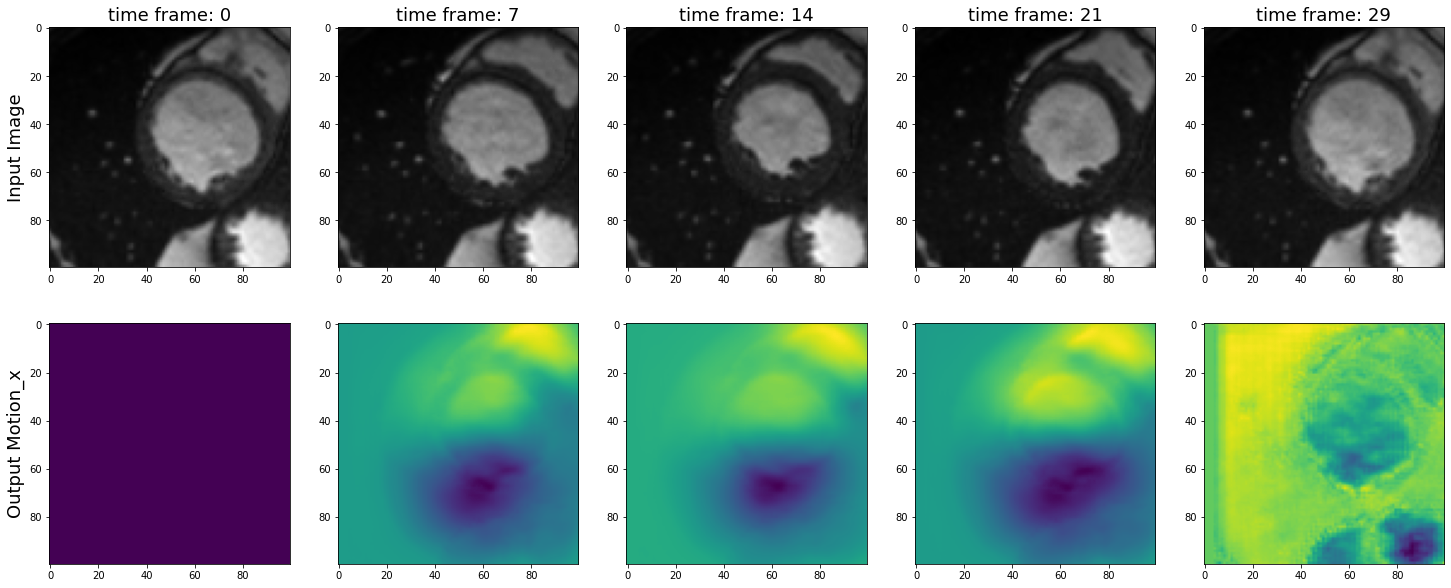

In [109]:
for image_path, motion_path in zip(glob.glob('./datasets/sample_nifti_4D/*'),
                                  glob.glob('./results/sample_nifti_4D/*_motion.h5')):
     
    hf = h5py.File(motion_path, 'r')
    
    n_time_frames = len(hf.keys())
    
    time_frame = 0
    
    image_nifti = nib.load(image_path)
    image_nifti = nifti_dataset.resample_nifti(image_nifti, in_plane_resolution_mm=1.25, number_of_slices=16)
    image = image_nifti.get_fdata()
    
    u_00 = hf['frame_%d/u'%(time_frame)][:]
    print(image.shape, u_00.shape);
    
    fig, ax = plt.subplots(2,5,figsize=(25,10))
    for j, time_frame in enumerate(np.linspace(0, n_time_frames-1, 5, dtype=int)):

        u_0t = hf['frame_%d/u'%(time_frame)][:]

        ax[0,j].imshow(image[100:200,100:200,8,time_frame], cmap='gray'); 
        ax[0,j].set_title('time frame: %d'%(time_frame), fontsize=18)

        ax[1,j].imshow(u_0t[100:200,100:200,8,0])

        if j == 0:
            ax[0,j].set_ylabel('Input Image', fontsize=18)
            ax[1,j].set_ylabel('Output Motion_x', fontsize=18)
    plt.show()

#### Test both segmentation and motion on 4D niftis. 

In [107]:
!bash ./scripts/test_segmentation_motion.sh ./datasets/sample_nifti_4D NIFTI ./results/sample_nifti_4D

+ DATAROOT=./datasets/sample_nifti_4D
+ DATAFORMAT=NIFTI
+ RESULTS_DIR=./results/sample_nifti_4D
+ CARSON_PATH=./pretrained_models/carson_Jan2021.h5
+ CARMEN_PATH=./pretrained_models/carmen_Jan2021.h5
+ PIPELINE=segmentation_motion
+ CUDA_VISIBLE_DEVICES=
+ python ./test.py --dataroot ./datasets/sample_nifti_4D --dataformat NIFTI --results_dir ./results/sample_nifti_4D --pretrained_models_netS ./pretrained_models/carson_Jan2021.h5 --pretrained_models_netME ./pretrained_models/carmen_Jan2021.h5 --pipeline segmentation_motion
2021-02-14 18:04:19.796322: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-02-14 18:04:21.998095: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-02-14 18:04:22.024630: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-02-14 18:04:22.0

After the segmentations and motion estimates have been generated, we can use both calculate myocardial strain. Note that we're passing the output folder from the previous runs. 

In [110]:
!bash ./scripts/test_strain.sh ./results/sample_nifti_4D

+ RESULTS_DIR=./results/sample_nifti_4D
+ PIPELINE=strain
+ CUDA_VISIBLE_DEVICES=
+ python ./test.py --dataroot ./results/sample_nifti_4D --results_dir ./results/sample_nifti_4D --pipeline strain
2021-06-29 15:13:10.181777: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
0.0 0.0
-0.002592995147247101 -2.9828856262617688e-05
0.05497309750391014 -0.0860405567508982
0.0612854542693979 -0.09091339230023547
0.06852412517151427 -0.09403671915940906
0.06710117788951095 -0.09446732248772671
0.06774282079012987 -0.09346288736198102
0.07301450053195244 -0.09431236655432026
0.07517955541754856 -0.09634545541729378
0.0736895711180657 -0.09784575437825384
0.06803631488810624 -0.09811611095470377
0.060040232921002294 -0.09603398752125841
-0.0092517097124806 -0.00752978450399237
0.04876613830529052 -0.09163613726516331
0.03944505611891089 -0.08569065988280934
0.03296507575336053 -0.07922440691724265
0.030013100534207093 -0.07306563

In [114]:
Ecc = nib.load('./results/sample_nifti_4D/patient101_4d_circumferential_strain.nii').get_fdata()

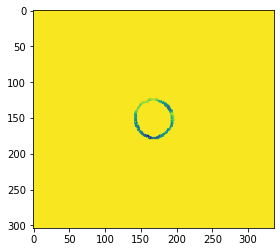

In [119]:
plt.imshow(Ecc[:,:,8,4])